In [1]:
import numpy as np 
import matplotlib.pyplot as plt
 
def carry(state, theta):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	final_state = np.dot(U, state)

	return final_state

def blue_carry(state, theta):
	'''
	blue carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number plus 1
	|1>-->|0>, phonon number minus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, down level minus 1
	up_state = carry_state_up[0]
	down_state_minus = carry_state_up[1]
	down_state_minus_0 = state_up[0][0]  # blue carry can not drive the phonon=0 && up level
	down_state_minus = np.delete(down_state_minus, 0)
	down_state_minus = np.insert(down_state_minus, len(down_state_minus)-1, 0)
	# after U operation, up level plus 1
	up_state_plus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_plus = np.insert(up_state_plus, 0, down_state_minus_0)
	up_state_plus = np.delete(up_state_plus, len(up_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_plus
	down = down_state_minus + down_state
	final_state = np.vstack((up, down))

	return final_state

def red_carry(state, theta):
	'''
	red carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number minus 1
	|1>-->|0>, phonon number plus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, up level minus 1
	up_state_minus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_minus_0 = state_down[1][0] # red carry can not drive the phonon=0 && down level
	up_state_minus = np.delete(up_state_minus,0)
	up_state_minus = np.insert(up_state_minus,len(up_state_minus)-1,0)
	# after U operation, down level plus 1
	up_state = carry_state_up[0]
	down_state_plus = carry_state_up[1]
	down_state_plus = np.insert(down_state_plus,0,up_state_minus_0)
	down_state_plus = np.delete(down_state_plus,len(down_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_minus
	down = down_state_plus + down_state
	final_state = np.vstack((up, down))

	return final_state

def Operator(up_state, down_state, func, theta):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = func(state, theta)

	return state[0], state[1]

def one_step_1(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T2R2T1R1
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_2(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_3(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r1T2R2T1r1   r1=sqrt(R1)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_4(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_5(state, theta):
	'''
	conventional quantum walk with boundary
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack([up_state, down_state, aux_state])
	return state


def N_step_1(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_1(state, theta_1, theta_2)
	return state

def N_step_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2(state, theta_1, theta_2)
	return state

def N_step_3(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_3(state, theta_1, theta_2)
	return state

def N_step_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_4(state, theta_1, theta_2)
	return state

def N_step_5(state, theta, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_5(state, theta)
	return state


# 制备初态

In [2]:
M = 1000
N = 500
n = 5
k =1
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
qiuhe = 0
for i in range(0,n):
    down_state[i] = np.exp(-k*1j)/np.sqrt(5)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))


# 50 步后结果

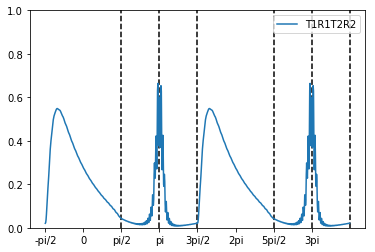

In [4]:
M = 1000
n = 1
N = 500
p2 = np.zeros(801)
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)
theta_1 = np.pi/2
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta_1, theta, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p2[i] = P[0] + P[1] + P[2]
plt.plot(theta_2, p2, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

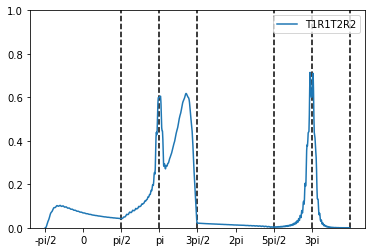

In [5]:
p1 = np.zeros(801)
for i,theta in enumerate(theta_2):
    state = N_step_2(init_state, theta, theta_1, N=100)
    P = abs(state[0])**2 + abs(state[1])**2 + abs(state[2])**2
    p1[i] = P[0] + P[1] + P[2]
plt.plot(theta_2, p1, label = 'T1R1T2R2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(5*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.vlines(7*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [47]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 
M = 100
n = 1

def plot_func(n,theta_1,theta_2,m,k):
    n = int(n)
    up_state = [0]*M
    down_state = [0]*M
    aux_state = [0]*M
    qiuhe = 0
    for i in range(0,int(m)):
        down_state[i] = np.exp(-i*k*1j)/np.sqrt(m)
    np.array(up_state)
    np.array(down_state)
    np.array(aux_state)
    init_state = np.vstack((up_state, down_state, aux_state))
    state = N_step_2(init_state, theta_1, theta_2, N=n)
    plt.figure(figsize=(6,9))
    plt.subplot(211)
    P1 = abs(state[0])**2
    P2 = abs(state[1])**2 
    phonon = np.arange(0, len(P2)) 
    plt.bar(phonon+0.5 ,P1 ,width = 0.5,facecolor = 'lightskyblue',edgecolor = 'white' ,label='spin up')
    plt.bar(phonon ,P2 ,width = 0.5,facecolor = 'yellowgreen',edgecolor = 'white' ,label='spin down')
    plt.xlim(0,40)
    plt.ylim(0,1)
    plt.legend()
    plt.subplot(212)
    P = P1 + P2
    plt.bar(phonon ,P)
    plt.xlim(0,40)
    plt.ylim(0,1)

interact(plot_func, n = widgets.FloatSlider(value=20, 
               min=0, 
               max=89, 
               step=1),theta_1=widgets.FloatSlider(value=0, 
               min=-2*np.pi, 
               max=3*np.pi, 
               step=0.05*np.pi),theta_2=widgets.FloatSlider(value=np.pi/3, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.01),m=widgets.FloatSlider(value=5, 
               min=0, 
               max=10, 
               step=1),k=widgets.FloatSlider(value=3*np.pi/2, 
               min=0, 
               max=2*np.pi, 
               step=0.05*np.pi)) 
plt.show()


interactive(children=(FloatSlider(value=20.0, description='n', max=89.0, step=1.0), FloatSlider(value=0.0, des…

In [46]:
m=2
k=3
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
qiuhe = 0
for i in range(0,int(m)):
    down_state[i] = np.exp(-i*k*1j)/np.sqrt(m)
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
state = N_step_2(init_state, 0, np.pi/2, N=1)


In [17]:
np.sin(np.pi/6)


0.49999999999999994